## Data Cleaning
Para resumir todas las acciones que tenemos que realizar cuando recibimos un dataset en cuestión de limpieza de datos, vamos a utilizar un dataset que contiene los datos históricos de interacciones entre humanos y tiburones.

https://www.kaggle.com/datasets/alinedebenath/global-shark-attacks

Este dataset contiene las siguente información en sus columnas:

* Case Number 
* Date
* Year		
* Type
* Country
* Area
* Location
* Activity
* Name
* Sex
* Age
* Injury
* Fatal (Y/N)
* Time
* Species
* Investigator or Source
* pdf
* href formula
* href
* Case Number.1
* Case Number.2	
* original order

**Primera exploración**

In [15]:
import pandas as pd                                # Importar la librería
df = pd.read_csv('GSAF5.csv', encoding='latin-1')  # Importar el dataset                      
df.columns                                         # Obtener nombres de las columnas

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

**Ver los primeros 5 registros para comprobar la carga correcta**

In [16]:
df.head() # Ver los primeros 5 registros

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.b-Luciano.pdf,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.a-NSB.pdf,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.17-Angiolella.pdf,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,2016.09.16,2016.09.15,5989,NaN,NaN


**Comprobamos el número de filas y columnas**

In [17]:
df.shape

(5992, 24)

**Obtenemos el tipo de dato por columna**

In [18]:
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [19]:
print("Información del dataframe (tipos de datos y uso de memoria):")
df.info()

Información del dataframe (tipos de datos y uso de memoria):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object


**Crear una muestra de los datos**

En esta primera etapa te interesa ser rápido generando una estructura de código que te permite explorar tus datos o resolver tus cuestiones. Para ello, es recomendable quedarse con una pequeña muestra de los datos (5, 10 o 100 registros según el tamaño de tus datos de entrada, por tener un criterio elegir un 1% o 5% de tus datos puede ser una buena idea).

In [21]:
new_df = df.head(10) # nuevo dataframe con head
#new_df = df.loc[:10]
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
new_df.shape

(10, 24)

**Seleccionar algunas columnas de interés**

In [22]:
new_df = new_df[['Case Number','Type', 'Country', 'Area', 'Activity', 'Injury', 'Fatal (Y/N)', 'Date', 'Year']]
new_df.head()

,Case Number,Type,Country,Area,Activity,Injury,Fatal (Y/N),Date,Year
0,2016.09.18.c,Unprovoked,USA,Florida,Surfing,Minor injury to thigh,N,18-Sep-16,2016
1,2016.09.18.b,Unprovoked,USA,Florida,Surfing,Lacerations to hands,N,18-Sep-16,2016
2,2016.09.18.a,Unprovoked,USA,Florida,Surfing,Lacerations to lower leg,N,18-Sep-16,2016
3,2016.09.17,Unprovoked,AUSTRALIA,Victoria,Surfing,Struck by fin on chest & leg,N,17-Sep-16,2016
4,2016.09.15,Unprovoked,AUSTRALIA,Victoria,Surfing,No injury: Knocked off board by shark,N,16-Sep-16,2016


**Analizar los registros duplicados**

El objetivo del análisis de datos es hacer un estudio de la información de la que disponemos y se presupone que la recogida de datos o la codificación de los mismos ha sido correcta. Sin embargo, en ocasiones, existen registros duplicados, es decir, la misma información aparece varias veces en los datos, lo que influye directamente en el resultado del análisis que se lleva a cabo ya que la información se encuentra distorsionada.

Antes de decidir cómo manejar estos registros duplicados es necesario revisarlos bien: ¿son duplicados puros o hay alguna variable que evita que la información esté duplicada?

**Comprobamos los duplicados**

Logica para [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Marca los duplicados como verdadero excepto la primera ocurrencia
- **`keep='last'`** (default): Marca los duplicados como verdadero excepto la ultima ocurrencia
- **`keep=False`**: Marca todos los duplicados como True.

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5987    False
5988    False
5989    False
5990    False
5991    False
Length: 5992, dtype: bool

In [24]:
# Cantidad de registros duplicados en todas sus columnas
df.duplicated().sum()

0

Duplicados por columna

In [25]:
# Cantidad de registros duplicados para la columna Case Number que debería ser unique
df['Case Number'].duplicated().sum()

16

Obtenemos los duplicados

In [26]:
# Envía todos los duplicados de Case Number a una lista
duplicates = df[df['Case Number'].duplicated(keep=False)]['Case Number'].tolist()
display(duplicates)

['2014.08.02',
 '2014.08.02',
 '2013.10.05',
 '2013.10.05',
 '2012.09.02.b',
 '2012.09.02.b',
 '2009.12.18',
 '2009.12.18',
 '2006.09.02',
 '2006.09.02',
 '2005.04.06',
 '2005.04.06',
 '1990.05.10',
 '1990.05.10',
 '1983.06.15',
 '1983.06.15',
 '1980.07.00',
 '1980.07.00',
 '1966.12.26',
 '1966.12.26',
 '1962.06.11.b',
 '1962.06.11.b',
 '1923.00.00.a',
 '1923.00.00.a',
 '1920.00.00.b',
 '1920.00.00.b',
 '1915.07.06.a.R',
 '1915.07.06.a.R',
 '1913.08.27.R',
 '1913.08.27.R',
 '1907.10.16.R',
 '1907.10.16.R']

**Eliminar duplicados**

Para aquellos casos que contienen información distinta vamos a generar un nuevo identificador modificando el Case Number. Para ello, vamos a generar un conjunto con la lista de los casos duplicados y vamos a iterar sobre ellos.

El proceso es crear un set de la lista duplicates y con un bucle for accedemos al registro correspondiente usando el método iloc() y una condición de filtrado. Sobre el registro correspondiente modificamos el Case Number añadiendo una letra ‘z’ al final. Observa que usamos el operador de concatenación de cadenas +. 

In [27]:
# Explorar primer duplicado
print(duplicates[0])
dup = df[df['Case Number'] == duplicates[0]]

# Filtrar dejando solo algunas columnas
dup = dup[['Case Number','Type','Country','Area','Activity']]
print(dup)

# Número de registros para el primer duplicado
print(len(dup))

# Segundo registro con todas sus columnas
print(dup.iloc[1,:])

# Segundo registro con todas sus columnas, pero accediendo a name (index)
print(dup.iloc[1,:].name)

# Ubica el registro por label de fila index, y nombre de columna 'Case Number'
print(df.loc[dup.iloc[1,:].name, 'Case Number'])

2014.08.02
    Case Number        Type Country     Area         Activity
300  2014.08.02  Unprovoked     USA  Florida          Surfing
301  2014.08.02  Unprovoked     USA  Florida  Boogie boarding
2
Case Number         2014.08.02
Type                Unprovoked
Country                    USA
Area                   Florida
Activity       Boogie boarding
Name: 301, dtype: object
301
2014.08.02


In [28]:
# Diccionario con los valores unique
set_duplicates = set(duplicates)
print(set_duplicates)

for r in set_duplicates:
    dup = df[df['Case Number'] == r]
    df.loc[dup.iloc[1,:].name, 'Case Number'] = df.loc[dup.iloc[1,:].name]['Case Number'] + 'z'

{'2009.12.18', '1980.07.00', '2005.04.06', '1962.06.11.b', '2012.09.02.b', '2006.09.02', '1915.07.06.a.R', '1907.10.16.R', '1913.08.27.R', '1990.05.10', '1966.12.26', '1920.00.00.b', '2013.10.05', '2014.08.02', '1923.00.00.a', '1983.06.15'}


In [29]:
df['Case Number'].duplicated().sum()

0

In [30]:
old_duplicate = df[df['Case Number'] == '2014.08.02z']
display(old_duplicate)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
301,2014.08.02z,02-Aug-14,2014,Unprovoked,USA,Florida,"Table Beach, Brevard County",Boogie boarding,Christian Sanhueza,M,8,Laceration to ankle,N,13h00,NaN,"Florida Today, 8/2/2014",2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2014.08.02-Sanhueza.pdf,2014.08.02,2014.08.02,5691,NaN,NaN


**Identificar valores nulos**

In [31]:
df.isnull().sum()


Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

Vamos a explorar la variable Injury porque puede darnos información extra. Para ello, sacamos un listado de valores y su frecuencia y también vamos a centrarnos en aquellos valores que toma cuando la variable Activity es nula. Observa que podemos usar la función isnull() como máscara para nuestros datos ya que nos devuelve una serie de True y False.

In [32]:
df['Injury'].value_counts()

FATAL                                                                   729
Survived                                                                 97
Foot bitten                                                              82
No injury                                                                77
Leg bitten                                                               71
                                                                       ... 
Puncture wounds on leg                                                    1
Left arm & leg lacerated                                                  1
Left leg & right testicle bitten                                          1
5 punctures to hand from captive shark PROVOKED INCIDENT                  1
FATAL. "Shark bit him in half, carrying away the lower extremities"       1
Name: Injury, Length: 3595, dtype: int64

In [33]:
df[(df['Activity'].isnull())]['Injury'].value_counts()

FATAL                                                 75
Survived                                              41
No details                                            22
No injury                                              8
Leg bitten                                             5
                                                      ..
Left leg bitten                                        1
Massive wound on right thigh with femur exposed        1
Knee lacerated                                         1
Foot severed FATAL                                     1
FATAL, femoral artery severed, died 12 days later      1
Name: Injury, Length: 329, dtype: int64

**Definir filtros**

Para ver la información con la que podemos rellenar este campo vamos a definir una serie de filtros para quedarnos con los casos que sean de nuestro interés a partir de las palabras ‘surfer’ y ‘board’ pero sin considerar ‘on board’ y ‘off board’. 

¿Cómo lo conseguimos? Con la función contains() del método str().

In [34]:
filter_1 = (df['Injury'].str.contains(' board ', na=False, regex=False))
filter_2 = (df['Injury'].str.contains('on board ', na=False, regex=False))
filter_3 = (df['Injury'].str.contains('off board ', na=False, regex=False))
filter_4 = (df['Injury'].str.contains(' surfer ', na=False, regex=False))
newdf = df[filter_1 & ~filter_2 & ~filter_3 & filter_4]

Observa el uso del símbolo ~, se usa para negar una condición.

La segunda variable sobre la que vamos a trabajar es Country. Podemos usar la variable Area para identificar si es costa este u oeste:

In [35]:
df['Coast'] = '' # creamos la columna vacío para rellenarlas
df['Coast'][df['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'West'
df['Coast'][~df['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'No west'

<ipython-input-35-16b63ae0f460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coast'][df['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'West'
<ipython-input-35-16b63ae0f460>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coast'][~df['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'No west'


In [36]:
df['Coast']

0       No west
1       No west
2       No west
3       No west
4       No west
         ...   
5987    No west
5988    No west
5989    No west
5990    No west
5991    No west
Name: Coast, Length: 5992, dtype: object

**Reducir el dataframe**

Una vez exploradas las series, los registros duplicados, los valores nulos y limpiado en unos pasos básicos el dataframe, te recomiendo filtrar y quedarse con aquellos registros o filas que te sean útiles para el análisis. En este caso, filtramos de nuevo la actividad surf y sobreescribimos el dataframe.

Entre paréntesis se incluye la condición: la columna ‘Activity’ debe ser igual a ‘Surfing’.
Puedes encadenar todos los condicionales que necesites usando el operador & (and) u | (or).

De esta forma reducimos el tamaño del dataframe, centrándonos en la información útil y obviando aquello que no es necesario para estudiar la hipótesis.

In [37]:
df = df[(df['Activity'] == 'Surfing')]

**Agrupación y agregación de información**

Para resumir la información del dataframe, la agrupación es nuestro mejor aliado. El método .groupby() genera grupos en base a una o varias variables, agg_variable, y aplica una función sobre otra variable, var_name, y su sintaxis es la siguiente:

In [38]:
df.groupby(['Country', 'Area']).count()

Case Number  Date  Year  Type  Location  Activity  \
Country   Area                                                                 
ANGOLA    West Africa                1     1     1     1         0         1   
AUSTRALIA New South Wales           88    88    88    88        87        88   
          Queensland                18    18    18    18        18        18   
          South Australia           22    22    22    22        22        22   
          Tasmania                   6     6     6     6         6         6   
...                                ...   ...   ...   ...       ...       ...   
USA       Puerto Rico                1     1     1     1         1         1   
          South Carolina             8     8     8     8         7         8   
          Texas                      7     7     7     7         7         7   
          Virginia                   1     1     1     1         1         1   
VENEZUELA Nueva Esparta              1     1     1     1         1         1   

                           Name  Sex   Age  Injury  Fatal (Y/N)  Time  \
Country   Area                                                          
ANGOLA    West Africa         1     1    0       1            1     0   
AUSTRALIA New South Wales    88    86   66      88           88    70   
          Queensland         18    18   14      17           18    11   
          South Australia    21    22   18      22           22    18   
          Tasmania            6     6    4       6            6     4   
...                         ...   ...  ...     ...          ...   ...   
USA       Puerto Rico         1     1    1       1            1     1   
          South Carolina      8     8    7       8            8     7   
          Texas               7     7    5       7            7     3   
          Virginia            1     1    1       1            1     1   
VENEZUELA Nueva Esparta       1     1    1       1            1     1   

                           Species   Investigator or Source  pdf  \
Country   Area                                                     
ANGOLA    West Africa             1                       1    1   
AUSTRALIA New South Wales        56                      88   88   
          Queensland             12                      18   18   
          South Australia        16                      22   22   
          Tasmania                3                       6    6   
...                             ...                     ...  ...   
USA       Puerto Rico             1                       1    1   
          South Carolina          4                       8    8   
          Texas                   4                       7    7   
          Virginia                0                       1    1   
VENEZUELA Nueva Esparta           1                       1    1   

                           href formula  href  Case Number.1  Case Number.2  \
Country   Area                                                                
ANGOLA    West Africa                 1     1              1              1   
AUSTRALIA New South Wales            88    88             88             88   
          Queensland                 18    18             18             18   
          South Australia            21    22             22             22   
          Tasmania                    6     6              6              6   
...                                 ...   ...            ...            ...   
USA       Puerto Rico                 1     1              1              1   
          South Carolina              8     8              8              8   
          Texas                       7     7              7              7   
          Virginia                    1     1              1              1   
VENEZUELA Nueva Esparta               1     1              1              1   

                           original order  Unnamed: 22  Unnamed: 23  Coast  
Country   Area                                

Junto con el método .groupby() es muy frecuente aplicar el método de agregación .agg() que permite aplicar una o varias funciones a una o más series.

A continuación te mostramos la sintaxis de un par de ejemplos que creemos que te pueden ser de gran utilidad.

df[["var_1", "var_2"]].agg(['sum', 'mean'])

In [39]:
df.groupby(['Country', 'Area']).count().reset_index()

,Country,Area,Case Number,Date,Year,Type,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Coast
0,ANGOLA,West Africa,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1
1,AUSTRALIA,New South Wales,88,88,88,88,87,88,88,86,66,88,88,70,56,88,88,88,88,88,88,88,0,0,88
2,AUSTRALIA,Queensland,18,18,18,18,18,18,18,18,14,17,18,11,12,18,18,18,18,18,18,18,0,0,18
3,AUSTRALIA,South Australia,22,22,22,22,22,22,21,22,18,22,22,18,16,22,22,21,22,22,22,22,0,0,22
4,AUSTRALIA,Tasmania,6,6,6,6,6,6,6,6,4,6,6,4,3,6,6,6,6,6,6,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,USA,Puerto Rico,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
68,USA,South Carolina,8,8,8,8,7,8,8,8,7,8,8,7,4,8,8,8,8,8,8,8,0,0,8
69,USA,Texas,7,7,7,7,7,7,7,7,5,7,7,3,4,7,7,7,7,7,7,7,0,0,7
70,USA,Virginia,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1


In [41]:
df1 = df.groupby(['Country', 'Area']).agg({'Type':'count','Coast':'count'}).reset_index()
df1

,Country,Area,Type,Coast
0,ANGOLA,West Africa,1,1
1,AUSTRALIA,New South Wales,88,88
2,AUSTRALIA,Queensland,18,18
3,AUSTRALIA,South Australia,22,22
4,AUSTRALIA,Tasmania,6,6
...,...,...,...,...
67,USA,Puerto Rico,1,1
68,USA,South Carolina,8,8
69,USA,Texas,7,7
70,USA,Virginia,1,1


**Data binning**

El data binning es el agrupamiento de datos, también llamado agrupamiento discreto de datos o agrupamiento de datos, es una técnica de preprocesamiento de datos utilizada para reducir los efectos de errores de observación menores.

La agrupación y segmentación de datos puede ser más exhaustiva con pandas haciendo distintos grupos dentro de una misma variable. Por ejemplo, en una variable donde se muestre el año, se pueden crear tramos por décadas. Uno de los casos más típicos es la creación de franjas de edades. 

Para hacer esta agrupación se utiliza el método .cut() que permite hacer estos “cortes” de una forma muy sencilla. A este proceso se le llama data binning.

En nuestro caso, vamos a quedarnos con los datos de los últimos 30 años, a partir de la generación de una variable Decada.

In [42]:
df['Decada'] = pd.cut(df.Year, 4, labels=range(1980, 2020, 10))

In [43]:
df['Decada']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
5004    2010
5048    2010
5808    2010
5837    2010
5891    1980
Name: Decada, Length: 904, dtype: category
Categories (4, int64): [1980 < 1990 < 2000 < 2010]

**Asegurar el tipo de dato**

En algunas ocasiones, las variables numéricas no tienen un sentido numérico y se deberían comportar como si fueran una cadena de texto o string.
Podemos cambiar los tipos de las variables casteando las columnas con la función astype().

In [44]:
df['Case Number'].astype(str)

0       2016.09.18.c
1       2016.09.18.b
2       2016.09.18.a
3         2016.09.17
4         2016.09.15
            ...     
5004      1922.01.04
5048      1918.03.22
5808      1828.00.00
5837      1779.00.00
5891         ND-0122
Name: Case Number, Length: 904, dtype: object

**Trabajar con fechas**

Un  caso especial es el manejo de las fechas, para asignar a una variable el tipo datetime64, uno de los más usados, lo mejor es usar el método to_datetime(var_name) siempre que la serie tenga el mismo formato numérico que un timestamp.

Lo primero que vamos a hacer es explorar el formato del campo fecha y para ello vamos a verificar la longitud del campo pasando la variable a una cadena de texto y aplicando la función len(). 

In [45]:
df['check_date'] = df.Date.str.len()
df['check_date'].value_counts()

9     850
4      15
6      12
20      9
12      8
13      3
25      3
11      2
23      1
14      1
Name: check_date, dtype: int64

Una vez que tenemos la longitud vemos qué formato es el más repetido y lo mostramos por pantalla:

In [46]:
df.loc[df.check_date == 9].head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Coast,Decada,check_date
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf,2016.09.18.c,2016.09.18.c,5993,NaN,NaN,No west,2010,9
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.b-Luciano.pdf,2016.09.18.b,2016.09.18.b,5992,NaN,NaN,No west,2010,9
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.a-NSB.pdf,2016.09.18.a,2016.09.18.a,5991,NaN,NaN,No west,2010,9
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.17-Angiolella.pdf,2016.09.17,2016.09.17,5990,NaN,NaN,No west,2010,9
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,2016.09.16,2016.09.15,5989,NaN,NaN,No west,2010,9


Vemos que el formato más repetido es el formado por dd-mmm-yy. Así que vamos a quedarnos con esos campos para los próximos pasos. Observa que se han concatenado varios filtros para descartar los casos que no nos interesaban.

Esta misma filosofía se puede usar para extraer la hora, minutos y segundos con las funciones: dt.hour(), dt.minute() y dt.second().

In [47]:
# Crear la serie Month extrayendo el mes de la serie Date
df = df.loc[(df.check_date == 9) &
            (df.Date.str.contains('-'))]
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%b-%y')

<ipython-input-47-42a9fa519b2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] =  pd.to_datetime(df['Date'], format='%d-%b-%y')


**Ordenar los valores**

A veces la exploración de los datos es mucho más cómoda si nuestros datos están ordenados. Para ello, podemos usar el método sort_values() permite ordenar un dataframe en base a una o varias variables, bien en orden creciente o decreciente. A continuación te muestro la forma de ordenar los datos de nuestros incidentes con tiburones en base al año del ataque.

In [48]:
df.sort_values('Year', ascending=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Coast,Decada,check_date
5048,1918.03.22,2018-03-22,1918,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Arthur Cook,M,NaN,"Severe laceration to arm, necessitating surgical amputation at the elbow",N,18h00,12' shark,"The Advertiser, 3/25/1918",1918.03.22-Cook.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1918.03.22-Cook.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1918.03.22-Cook.pdf,1918.03.22,1918.03.22,945,NaN,NaN,No west,2010,9
5004,1922.01.04,2022-01-04,1922,Unprovoked,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",Surfing,John Manning Rowe,M,26,"FATAL, disappeared, then his shark-bitten remains washed ashore",Y,Evening,NaN,"The Argus, 1/9/1922; V.M. Coppleson (1933), N15",1922.01.04-JManningRowe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1922.01.04-JManningRowe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1922.01.04-JManningRowe.pdf,1922.01.04,1922.01.04,989,NaN,NaN,No west,2010,9
4687,1935.03.11,2035-03-11,1935,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Eric McMichael,M,NaN,Abrasions to shins,N,NaN,NaN,"Sydney Morning Herald, 3/11/1935",1935.03.11-McMichael.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1935.03.11-McMichael.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1935.03.11-McMichael.pdf,1935.03.11,1935.03.11,1306,NaN,NaN,No west,2010,9
4660,1936.01.05,2036-01-05,1936,Invalid,AUSTRALIA,Queensland,"Main Beach, Southport",Surfing,Kevin Canavan,M,17,Disappeared & his torn clothing washed ashore,N,NaN,Shark involvement prior to death was not confirmed,"Canberra Times, 1/7/1936; V.M. Coppleson, p.92-93",1936.01.05-Canavan.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1936.01.05-Canavan.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1936.01.05-Canavan.pdf,1936.01.05,1936.01.05,1333,NaN,NaN,No west,2010,9
4430,1944.01.14,2044-01-14,1944,Unprovoked,AUSTRALIA,New South Wales,"First Beach, Forster",Surfing,Peter Weir,M,14,"Both legs bitten, one surgically amputated",N,17h00,NaN,"G.P. Whitley (1951), p.193, cites Daily Mirror (Sydney) 1/18/1944; V.M. Coppleson (1958), p.84",1944.01.14-Weir.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1944.01.14-Weir.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1944.01.14-Weir.pdf,1944.01.14,1944.01.14,1563,NaN,NaN,No west,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016.02.10,2016-02-10,2016,Invalid,AUSTRALIA,Tasmania,Nettley Bay,Surfing,male,M,NaN,"No injury, knocked off board",N,12h30,No shark involvement,"C. Black, GSAF",2016.02.11-NettleyBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.02.11-NettleyBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.02.11-NettleyBay.pdf,2016.02.10,2016.02.10,5902,NaN,NaN,No west,2010,9
95,2016.01.28,2016-01-28,2016,Unprovoked,USA,Hawaii,"Hanalei Bay, Kauai",Surfing,male,M,NaN,Lacerations to both hands,N,14h00,"Reef shark, 5'",KHON2. 1/28/2016,2016.01.28-Kauai.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.28-Kauai.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.28-Kauai.pdf,2016.01.28,2016.01.28,5898,NaN,NaN,No west,2010,9
96,2016.01.25,2016-01-25,2016,Unprovoked,USA,Hawaii,"Hanalei Bay, Kauai,",Surfing,Kaya Waldman,F,15,No injury,N,11h30,NaN,"The Garden Island, 2/2/2016",2016.01.25-Waldman.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.25-Waldman.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.25-Waldman.pdf,2016.01.25,2016.01.25,5897,NaN,NaN,No west,2010,9
30,2016.07.16.b,2016-07-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,female,F,9,Minor injury to leg,N,1300,NaN,"Orlando Sentinel,

**Probar la hipótesis**

Por último, vamos a intentar responder a la pregunta inicial que se había planteado y para ello vamos a realizar una serie de conteos para probar la hipótesis del estudio. 

In [49]:
df.Country.value_counts()

USA                           498
AUSTRALIA                     163
SOUTH AFRICA                   90
BRAZIL                         34
REUNION                        19
NEW ZEALAND                    11
MEXICO                          5
INDONESIA                       4
ECUADOR                         4
EL SALVADOR                     2
VENEZUELA                       2
NEW CALEDONIA                   2
FIJI                            2
COSTA RICA                      2
JAPAN                           2
BAHAMAS                         1
UNITED ARAB EMIRATES (UAE)      1
FRENCH POLYNESIA                1
MEXICO                          1
CANADA                          1
URUGUAY                         1
OKINAWA                         1
MOZAMBIQUE                      1
DOMINICAN REPUBLIC              1
Name: Country, dtype: int64

Y tras comprobar que EE.UU. es el país con mayor número de ataques vamos a comparar los incidentes en las dos costas con los valores que hemos definido antes. Vamos a hacer un gráfico rápido aunque se explicarán más adelante la forma de realizar múltiples tipos de gráficos. 

<AxesSubplot:title={'center':'Shark Attacks'}, ylabel='Coast'>

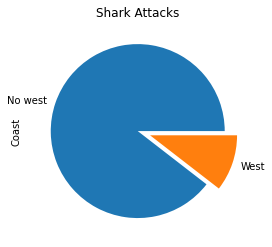

In [50]:
df.Coast.value_counts().plot.pie(explode=(0, 0.15), title ='Shark Attacks')